<a href="https://colab.research.google.com/github/Mashetahhalim/dataAnalysis/blob/main/Data_and_Analytics_Capstone_Project_Learners_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functional Capstone Project - Data & Analytics



## Business Context

**Infini Telco** is a prominent player in the telco industry with a strong presence in Malaysia. Specializing in B2B sales, they serve as a vital link in the supply chain, facilitating the distribution of telecommunication and technology products to retailers, service providers, and other businesses across the continent.

Despite their market dominance and expansive product offerings, the company faces critical business challenge related to marketing strategy. A key aspect of this involves the ***identification and segmentation of their customer base into well-defined segments based on discernible patterns in product purchase behaviour and understand their product portfolio.*** By understanding the distinct needs, preferences, and purchasing habits of different customer segments, the client can develop targeted marketing strategies that cater to the specific needs of each segment, enhancing customer satisfaction and loyalty, driving revenue growth.




## Business Challenges

- No streamlined process to handle data and data is only available in chunks
- Limited intel on customer purchase patterns to drive targeted marketing
- Inadequate product insights across different customer groups


## Project Objectives

The business needs your help as a ***data analyst*** to overcome these challenges. Apply your data analytics skillset learnt.



### 1. Data Preprocessing

Data preparation is a critical process first step, involving the gathering, cleaning, transforming, and organizing of raw data into a format suitable for analysis. This step is essential for ensuring the quality and reliability of the insights derived from the data.

Here, the transaction data is provided from June 2020 to December 2022, which are stored across three separate csv files. The dataset are:

- Transactions_1.csv
- Transactions_2.csv
- Transactions_3.csv

***Task 1.1: Combine the transaction data files***

Find a way to combine the above data together into a singular dataframe, that will contain all the transactions at one place. Name this singular dataframe df_Txn_full.

In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 100

In [2]:
# Load each transaction CSV file into a separate DataFrame
df1 = pd.read_csv('Transactions_1.csv')
df2 = pd.read_csv('Transactions_2.csv')
df3 = pd.read_csv('Transactions_3.csv')

# Combine the three DataFrames into one
df_Txn_full = pd.concat([df1, df2, df3], ignore_index=True)

In [10]:
# Load the individual CSV files
df1 = pd.read_csv('Transactions_1.csv')
df2 = pd.read_csv('Transactions_2.csv')
df3 = pd.read_csv('Transactions_3.csv')

# Combine all three DataFrames into one
df_Txn_full = pd.concat([df1, df2, df3], ignore_index=True)

# Optional: Preview the combined DataFrame
print(df_Txn_full.shape)
df_Txn_full.head()

(1353671, 12)


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,000000000000100095,ZSV,0.00,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1


In [11]:
# Check basic info
df_Txn_full.info()

# check missing values
print("Missing values per column:")
print(df_Txn_full.isnull().sum())

# Check for duplicates
df_Txn_full.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 12 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   INDEX                          1353671 non-null  int64  
 1   INVOICE_NUMBER                 1353671 non-null  int64  
 2   INVOICE_ITEM                   1353671 non-null  int64  
 3   DOCUMENT_DATE                  1353671 non-null  object 
 4   CUSTOMER_NUMBER                1353671 non-null  int64  
 5   Main_account                   1353671 non-null  int64  
 6   Main_account_name              1353671 non-null  object 
 7   Main_resposible_employee_name  1353671 non-null  object 
 8   PRODUCT                        1353671 non-null  object 
 9   Position_type_order_line       1353671 non-null  object 
 10  GROSS_TURNOVER                 1353671 non-null  float64
 11  AMOUNT                         1353671 non-null  int64  
dtypes: float64(1),

np.int64(0)

**Validation checkpoints:**
Consider, you would have received some information from the business on:

- Gross Annual Turnover for this period to be ~$1.4B
- The total unique products are ~190000
- The total customer base is ~7k

***Task 1.1.1***:

Use the above information to validate the data creation process. This is to ensure that no records of data are lost in the process.

In [9]:
# 1. Total Gross Turnover
total_gross_turnover = df_Txn_full['GROSS_TURNOVER'].sum()
print(f"Total Gross Turnover: ${total_gross_turnover:,.2f}")

# 2. Total Unique Products
unique_products = df_Txn_full['PRODUCT'].nunique()
print(f"Total Unique Products: {unique_products}")

# 3. Total Unique Customers
unique_customers = df_Txn_full['CUSTOMER_NUMBER'].nunique()
print(f"Total Unique Customers: {unique_customers}")

Total Gross Turnover: $1,466,478,196.72
Total Unique Products: 191394
Total Unique Customers: 7130


***Task 1.2: Join the mapping files to the transaction data***


Mapping files contain supplementary detailed information that will be used for our analysis.
Use these mapping files to join with the above transaction data to create the master dataset <br><br>
**List of mapping files and their primary keys:**<br>
1. Customer Characteristics : to be joined on Customer Number
2. Customer Type Mapping : to be joined on Main Account ID
3. Product Category Mapping : to be joined on Product ID

To ensure that the joins are performed accurately, it is a good practice to clean up the columns upon which the join is performed.
Some recommended steps to clean up a column are:

- ensuring the values are of the same data type
- removing leading zeroes
- removing leading and trailing whitespaces etc.


***Task 1.2.1:***

Here, before, performing the joins, you have to perform an intermediary step to clean up the below columns based on the above recommended steps:

- customer_number
- Product
- Main_account
- Invoice_Number

*Hint: Check for any leading or trailing 0s or white spaces.*

In [14]:
# Convert relevant columns to string and strip whitespaces and leading zeros
df_Txn_full['CUSTOMER_NUMBER'] = df_Txn_full['CUSTOMER_NUMBER'].astype(str).str.strip().str.lstrip('0')
df_Txn_full['PRODUCT'] = df_Txn_full['PRODUCT'].astype(str).str.strip().str.lstrip('0')
df_Txn_full['Main_account'] = df_Txn_full['Main_account'].astype(str).str.strip().str.lstrip('0')
df_Txn_full['INVOICE_NUMBER'] = df_Txn_full['INVOICE_NUMBER'].astype(str).str.strip().str.lstrip('0')

# Show cleaned data (first 5 rows )
df_Txn_full[['CUSTOMER_NUMBER', 'PRODUCT', 'Main_account', 'INVOICE_NUMBER']].head(5)

,CUSTOMER_NUMBER,PRODUCT,Main_account,INVOICE_NUMBER
0,14816,100095,14816,124289578
1,17566,100095,17566,124317609
2,17566,100095,17566,124317609
3,17566,100095,17566,124317609
4,17566,100095,17566,124317609


In [20]:
# Load CSV file
df_Customer_Characteristics = pd.read_csv('Customer Characteristics.csv', encoding='ISO-8859-1')
df_Customer_Type_Mapping = pd.read_csv('Customer Type Mapping.csv', encoding='ISO-8859-1')
df_Product_Category_Mapping = pd.read_csv('Product Categories.csv', encoding='ISO-8859-1')

df_Customer_Characteristics.info()
df_Customer_Type_Mapping.info()
df_Product_Category_Mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7130 entries, 0 to 7129
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMER_NAME       7130 non-null   object
 1   CUSTOMER_NUMBER     7130 non-null   int64 
 2   ACCOUNT_GROUP_TXT   7130 non-null   object
 3   CVR_Company_status  6813 non-null   object
dtypes: int64(1), object(3)
memory usage: 222.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Main_account_ID  6855 non-null   int64 
 1   Customer_type    4555 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83011 entries, 0 to 83010
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductID

***Task 1.2.2:***

Import the mapping files and rename the dataframe:

- Customer Characteristics.csv : df_CustChar
- Customer Type Mapping.csv : df_CustType
- Product Categories.csv : df_ProdCategories

In [26]:
# Import mapping files and assign to specified DataFrame names
df_CustChar = pd.read_csv('Customer Characteristics.csv')
df_CustType = pd.read_csv('Customer Type Mapping.csv')
df_ProdCategories = pd.read_csv('Product Categories.csv', encoding='ISO-8859-1')


# Preview to confirm successful import
print("Customer Characteristics Sample:")
print(df_CustChar.head())

print("\nCustomer Type Mapping Sample:")
print(df_CustType.head())

print("\nProduct Categories Sample:")
print(df_ProdCategories.head())


Customer Characteristics Sample:
     CUSTOMER_NAME  CUSTOMER_NUMBER ACCOUNT_GROUP_TXT CVR_Company_status
0  CUSTOMER_NAME_0            35016           Debtors             Normal
1  CUSTOMER_NAME_1            38336           Debtors             Normal
2  CUSTOMER_NAME_2            38438           Debtors             Normal
3  CUSTOMER_NAME_3            45001           Debtors             Normal
4  CUSTOMER_NAME_2            45005           Debtors             Normal

Customer Type Mapping Sample:
   Main_account_ID Customer_type
0            10014           A-B
1            10025           A-B
2            10033           A-B
3            10048             D
4            10056             C

Product Categories Sample:
            ProductID  ProductCategoryID                   ProdCat2  \
0  000000010001151351                739  Web Conferencing Services   
1  000000010000802665                739  Web Conferencing Services   
2  000000000614529000                739  Web Conferencing 

***Task 1.2.3:***

To perform join on the dataframes, it is important to clean the columns to ensure that the columns are free from any special characters.

- Remove any leading or trailing 0s in Customer_Number column in the df_CustChar dataframe.
- Check for duplicates in the data and remove any duplicates.
- Create a master dataframe by performing appropriate join on df_CustChar dataframe and df_Txn_full dataframe. Rename the master dataframe as df_Master.



In [29]:
# 1. Clean CUSTOMER_NUMBER in df_CustChar
df_CustChar['CUSTOMER_NUMBER'] = df_CustChar['CUSTOMER_NUMBER'].astype(str).str.strip().str.lstrip('0')

# 2. Remove duplicates
df_CustChar = df_CustChar.drop_duplicates(subset='CUSTOMER_NUMBER')

# 3. Join with df_Txn_full to create df_Master
df_Master = pd.merge(df_Txn_full, df_CustChar, on='CUSTOMER_NUMBER', how='left')

# Display the first 5 rows of the master dataframe to confirm successful join
print("Master DataFrame Preview:")
print(df_Master.head())


Master DataFrame Preview:
   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  CVR_Company_status_x  Main_account_ID  \
0                      ZSV  

***Task 1.2.4:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [30]:
# 1. Gross Annual Turnover Validation
total_gross_turnover_master = df_Master['GROSS_TURNOVER'].sum()
print(f"Total Gross Turnover: ${total_gross_turnover_master:,.2f}")

# 2. Total Unique Customers Validation
unique_customers_master = df_Master['CUSTOMER_NUMBER'].nunique()
print(f"Total Unique Customers: {unique_customers_master}")


Total Gross Turnover: $1,466,478,196.72
Total Unique Customers: 7130


***Task 1.2.5:***

Now, you will be joining the df_CustType dataframe with the master dataframe.

- Remove any leading or trailing 0s in Main_account_ID column in the df_CustType dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_CustType dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [32]:
# 1. Clean Main_account_ID column in df_CustType
df_CustType['Main_account_ID'] = df_CustType['Main_account_ID'].astype(str).str.strip().str.lstrip('0')

# 2. Remove duplicates in df_CustType based on Main_account_ID
df_CustType = df_CustType.drop_duplicates(subset='Main_account_ID')

# 3. Perform the join between df_Master and df_CustType
df_Master = pd.merge(df_Master, df_CustType, left_on='Main_account', right_on='Main_account_ID', how='left')


In [33]:
# Display the first 5 rows to verify
print(df_Master.head())

# Check for missing values in the joined columns
print("\nMissing values in critical columns after join:")
print(df_Master[['CUSTOMER_NUMBER', 'PRODUCT', 'INVOICE_NUMBER', 'Main_account']].isnull().sum())


   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  ProductCategoryID  ProdCat2 ProdCat1  \
0                      ZSV  ...                NaN     

***Task 1.2.6:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [34]:
# 1. Gross Annual Turnover Validation
total_gross_turnover_master = df_Master['GROSS_TURNOVER'].sum()
print(f"Total Gross Turnover after join: ${total_gross_turnover_master:,.2f}")

# 2. Total Unique Customers Validation
unique_customers_master = df_Master['CUSTOMER_NUMBER'].nunique()
print(f"Total Unique Customers after join: {unique_customers_master}")


Total Gross Turnover after join: $1,466,478,196.72
Total Unique Customers after join: 7130


***Task 1.2.7:***

Now, you will be joining the df_ProdCategories dataframe with the master dataframe.

- Remove any leading or trailing 0s in ProductID column in the df_ProdCategories dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_ProdCategories dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [36]:
# Step 1: Clean ProductID column in df_ProdCategories
df_ProdCategories['ProductID'] = df_ProdCategories['ProductID'].astype(str).str.strip().str.lstrip('0')

# Step 2: Remove duplicates in df_ProdCategories based on ProductID
df_ProdCategories = df_ProdCategories.drop_duplicates(subset='ProductID')

# Step 3: Perform the join between df_Master and df_ProdCategories
# Ensure the column names for ProductID are aligned in both DataFrames for the merge
df_Master = pd.merge(df_Master, df_ProdCategories, left_on='PRODUCT', right_on='ProductID', how='left')

# Display the first 5 rows to verify the join
print("Master DataFrame after joining with df_ProdCategories:")
print(df_Master.head())

# Step 4: Check for missing values across all columns to ensure the join is successful
print("\nMissing values in all columns after join:")
print(df_Master.isnull().sum())


Master DataFrame after joining with df_ProdCategories:
   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  Main_account_ID  Customer_type ProductID

***Task 1.2.8:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k
- The total product is ~15k

In [37]:
# 1. Gross Annual Turnover Validation
total_gross_turnover_master = df_Master['GROSS_TURNOVER'].sum()
print(f"Total Gross Turnover after all merges: ${total_gross_turnover_master:,.2f}")

# 2. Total Unique Customers Validation
unique_customers_master = df_Master['CUSTOMER_NUMBER'].nunique()
print(f"Total Unique Customers after all merges: {unique_customers_master}")

# 3. Total Unique Products Validation
unique_products_master = df_Master['PRODUCT'].nunique()
print(f"Total Unique Products after all merges: {unique_products_master}")


Total Gross Turnover after all merges: $1,466,478,196.72
Total Unique Customers after all merges: 7130
Total Unique Products after all merges: 150545


***Task 1.3: Data Cleaning***

A major part of data pre processing involves cleaning the data, removing nulls, filtering out irrelavant or less useful information. For example:

- Remove rows with missing product id
- Removing rows with negative or zero turnover
- Removing customers who interacted very less

As part of Data Cleaning of this dataset you are required to perform the following:

***Task 1.3.1: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase less frequently

In [38]:
# Step 1: Count the number of transactions for each customer (based on CUSTOMER_NUMBER)
customer_txn_count = df_Master.groupby('CUSTOMER_NUMBER')['INVOICE_NUMBER'].nunique()

# Step 2: Add the 'Invoice_flag' column to df_Master based on transaction count
df_Master['Invoice_flag'] = df_Master['CUSTOMER_NUMBER'].map(customer_txn_count).apply(lambda x: 0 if x <= 3 else 1)

# Preview the result
print(df_Master[['CUSTOMER_NUMBER', 'INVOICE_NUMBER', 'Invoice_flag']].head())


  CUSTOMER_NUMBER INVOICE_NUMBER  Invoice_flag
0           14816      124289578             1
1           17566      124317609             1
2           17566      124317609             1
3           17566      124317609             1
4           17566      124317609             1


***Task 1.3.2: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase single SKU.

In [39]:
# Step 1: Count the number of unique SKUs (PRODUCT) for each customer (based on CUSTOMER_NUMBER)
customer_sku_count = df_Master.groupby('CUSTOMER_NUMBER')['PRODUCT'].nunique()

# Step 2: Add the 'Invoice_flag' column to df_Master based on the number of SKUs purchased
df_Master['Invoice_flag'] = df_Master['CUSTOMER_NUMBER'].map(customer_sku_count).apply(lambda x: 0 if x == 1 else 1)

# Preview the result
print(df_Master[['CUSTOMER_NUMBER', 'PRODUCT', 'Invoice_flag']].head())


  CUSTOMER_NUMBER PRODUCT  Invoice_flag
0           14816  100095             1
1           17566  100095             1
2           17566  100095             1
3           17566  100095             1
4           17566  100095             1


There are a few records in the dataset whose Product ID are null. These records won't map to product information from the mapping file and hence these records will not be useful for the analysis.

***Task 1.3.3: In the master data, remove records where Product ID is null and save it in a dataframe df_Filtered***

In [66]:
# Task 1.3.3: Remove records where Product ID is null and save the result in df_Filtered
df_Filtered = df_Master[df_Master['PRODUCT'].notna()]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'PRODUCT']].head())


  CUSTOMER_NUMBER PRODUCT
0           14816  100095
1           17566  100095
2           17566  100095
3           17566  100095
4           17566  100095


There are a few records that lack information on product category and will not be useful for the analysis

***Task 1.3.4: In the df_Filtered dataftame, remove records where Product Category information is null***


In [71]:
# Step 1: Check the columns of df_Filtered to confirm the correct column name
print(df_Filtered.columns)

# Step 2: Remove records where Product Category is null in df_Filtered
df_Filtered = df_Filtered[df_Filtered['ProductCategoryID'].notna()]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'PRODUCT', 'ProductCategoryID']].head())


Index(['INDEX', 'INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE',
       'CUSTOMER_NUMBER', 'Main_account', 'Main_account_name',
       'Main_resposible_employee_name', 'PRODUCT', 'Position_type_order_line',
       'GROSS_TURNOVER', 'AMOUNT', 'CUSTOMER_NAME_x', 'ACCOUNT_GROUP_TXT_x',
       'CVR_Company_status_x', 'Main_account_ID_x', 'Customer_type_x',
       'ProductID_x', 'ProductCategoryID_x', 'ProdCat2_x', 'ProdCat1_x',
       'CUSTOMER_NAME_y', 'ACCOUNT_GROUP_TXT_y', 'CVR_Company_status_y',
       'Main_account_ID_y', 'Customer_type_y', 'Main_account_ID',
       'Customer_type', 'ProductID_y', 'ProductCategoryID_y', 'ProdCat2_y',
       'ProdCat1_y', 'ProductID', 'ProductCategoryID', 'ProdCat2', 'ProdCat1',
       'Invoice_flag'],
      dtype='object')
  CUSTOMER_NUMBER PRODUCT  ProductCategoryID
0           14816  100095               8.00
1           17566  100095               8.00
2           17566  100095               8.00
3           17566  100095               8.00
4    

There are some sales made to Internal accounts in the dataset. These sales can be removed from analysis as information on internal sales can distort the analysis of customer behaviour. Internal transactions do not reflect the actual market demand or customer preferences.

***Task 1.3.5: In the df_Filtered dataframe, remove records pertaining to sales to Internal Account***

*Hint: Check for Internal accounts in Account_Group_TXT field*

In [72]:
# Step 1: Inspect unique values in the account group column to confirm the naming
print(df_Filtered['ACCOUNT_GROUP_TXT_x'].unique())

# Step 2: Filter out records where the account group indicates 'Internal'
df_Filtered = df_Filtered[~df_Filtered['ACCOUNT_GROUP_TXT_x'].str.contains('Internal', case=False, na=False)]

# Preview the cleaned dataframe
print(df_Filtered[['CUSTOMER_NUMBER', 'ACCOUNT_GROUP_TXT_x']].head())


['Debtors' 'Internal accounts']
  CUSTOMER_NUMBER ACCOUNT_GROUP_TXT_x
0           14816             Debtors
1           17566             Debtors
2           17566             Debtors
3           17566             Debtors
4           17566             Debtors


As per business requirement, sales made to "ZSKA" and "ZDIR" are requested to be removed.

***Task 1.3.6: In the df_Filtered dataframe, remove records with position types "ZSKA" and "ZDIR"***

*Hint: Check column Position_type_order_line*

In [73]:
# Step 1: Inspect unique values to confirm presence of 'ZSKA' and 'ZDIR'
print(df_Filtered['Position_type_order_line'].unique())

# Step 2: Remove records with position types 'ZSKA' and 'ZDIR'
df_Filtered = df_Filtered[~df_Filtered['Position_type_order_line'].isin(['ZSKA', 'ZDIR'])]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'Position_type_order_line']].head())


['ZSV' 'ZGRA' 'ZGSK' 'ZDIX' 'ZUBG' 'ZLAG' 'ZKSK' 'ZGKS' 'ZRAK' 'ZAFH'
 'ZDIS' 'ZDIR' 'ZSTK' 'ZZSR' 'ZKON' 'ZSKA' 'ZRMA' 'ZSRP' 'ZRKU' 'ZSK'
 'ZKRE' 'ZKKO' 'ZROK' 'ZDRE' 'ZGAF' 'ZKOU' 'ZPRO' 'ZZLA' 'ZRSE' 'ZSRS'
 'ZKOR' 'ZREG' 'ZREO' 'ZROU' 'ZSUB' 'ZSSG' 'ZGNO' 'ZGSC' 'ZKDI' 'ZENO'
 'ZKSC' 'ZARM' 'ZTKO' 'ZSTR' 'ZZSS' 'ZKSL' 'ZSSC' 'ZREQ' 'ZUBE' 'ZKRT']
  CUSTOMER_NUMBER Position_type_order_line
0           14816                      ZSV
1           17566                      ZSV
2           17566                      ZSV
3           17566                      ZSV
4           17566                      ZSV


Some companies are currently not active or are in normal operation. It makes sense to exclude these companies from analysis. But, for companies whose status is unknown (null/na), we still retain them.

***Task 1.3.7: In the df_Filtered dataframe, remove records whose company status are not active/normal***

*Hint: Check column CVR_Company_status*

In [74]:
# Step 1: Inspect unique values in the company status column
print(df_Filtered['CVR_Company_status_x'].unique())

# Step 2: Keep only records where status is 'Active', 'Normal', or null
df_Filtered = df_Filtered[
    (df_Filtered['CVR_Company_status_x'].isin(['Active', 'Normal'])) |
    (df_Filtered['CVR_Company_status_x'].isna())
]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'CVR_Company_status_x']].head())


['Normal' 'Active' nan 'Inactive']
  CUSTOMER_NUMBER CVR_Company_status_x
0           14816               Normal
1           17566               Normal
2           17566               Normal
3           17566               Normal
4           17566               Normal


There might be some records where Gross Turnover is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.8: In the df_Filtered dataframe, remove records where Gross Turnover is zero or negative***

In [75]:
# Step 1: Inspect values to ensure correct column type and content
print(df_Filtered['GROSS_TURNOVER'].describe())

# Step 2: Remove records where GROSS_TURNOVER is zero or negative
df_Filtered = df_Filtered[df_Filtered['GROSS_TURNOVER'] > 0]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'PRODUCT', 'GROSS_TURNOVER']].head())


count   1299974.00
mean        998.66
std        4628.87
min     -258547.03
25%          95.48
50%         259.02
75%         743.08
max      958998.14
Name: GROSS_TURNOVER, dtype: float64
    CUSTOMER_NUMBER     PRODUCT  GROSS_TURNOVER
530           15082  5737657492         3870.22
531           15082  4441429746          286.81
532           15082  4289348828          411.15
533           15082  4325804446           31.65
534           15082   271354105           16.38


There might be some records where Amount is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.9: In the df_Filtered dataframe, remove records where Amount is zero or negative***


In [76]:
# Step 1: Inspect basic stats for the AMOUNT column
print(df_Filtered['AMOUNT'].describe())

# Step 2: Remove records where AMOUNT is zero or negative
df_Filtered = df_Filtered[df_Filtered['AMOUNT'] > 0]

# Preview the cleaned data
print(df_Filtered[['CUSTOMER_NUMBER', 'PRODUCT', 'AMOUNT']].head())


count   1270622.00
mean         80.76
std         784.58
min        -227.00
25%           1.00
50%           3.00
75%          15.00
max      248000.00
Name: AMOUNT, dtype: float64
    CUSTOMER_NUMBER     PRODUCT  AMOUNT
530           15082  5737657492       1
531           15082  4441429746       1
532           15082  4289348828       1
536           15082    31592006       1
538           15082     JSF 505       1


Remember, you had created a column to flag the customers whose number of transactions are 3 or less than that. Customers with very few transactions may introduce noise into the data, making it harder to identify meaningful patterns and trends. Filtering out these customers results in a cleaner dataset, which enhances the accuracy and reliability of the analysis.

***Task 1.3.10: In the df_Filtered dataframe, filter out customers who have made 3 or fewer transactions***

*Hint: Utilize the Invoice_flag column created earlier.*

In [77]:
# Step 1: Filter the df_Filtered dataframe to keep only frequent purchasers (Invoice_flag = 1)
df_Filtered = df_Filtered[df_Filtered['Invoice_flag'] == 1]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'INVOICE_NUMBER', 'Invoice_flag']].head())


    CUSTOMER_NUMBER INVOICE_NUMBER  Invoice_flag
530           15082      124195645             1
531           15082      124167744             1
532           15082      123658470             1
536           15082      124385024             1
538           15082      123063686             1


You had also created a column to flag the customers who purchased only one sku. Such records in the data also tends to add noise and is necesary to filter these customers out.

***Task 1.3.11: In the df_Filtered dataframe, filter out customers who have purchased only a single SKU***

*Hint: Utilize the SKU_flag column created earlier.*

In [79]:
# Recalculate number of unique SKUs per customer
customer_sku_count = df_Filtered.groupby('CUSTOMER_NUMBER')['PRODUCT'].nunique()

# Add SKU_flag column: 0 = single SKU, 1 = multiple SKUs
df_Filtered['SKU_flag'] = df_Filtered['CUSTOMER_NUMBER'].map(customer_sku_count).apply(lambda x: 0 if x == 1 else 1)

# Filter to keep only customers who bought multiple SKUs
df_Filtered = df_Filtered[df_Filtered['SKU_flag'] == 1]

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'PRODUCT', 'SKU_flag']].head())


    CUSTOMER_NUMBER     PRODUCT  SKU_flag
530           15082  5737657492         1
531           15082  4441429746         1
532           15082  4289348828         1
536           15082    31592006         1
538           15082     JSF 505         1


There are some information from the business and the business aligned on the fact that some very large customers are outliers and having them in the data could skew the analysis results. Hence, they should be filtered out. These customer types are denoted by KAM (Key Account Management).

***Task 1.3.12: In the df_Filtered dataframe, Filter out "Key" customer accounts***

*Hint: Check Customer_type column*

In [80]:
# Step 1: Inspect unique values in the Customer_type column
print(df_Filtered['Customer_type'].unique())

# Step 2: Filter out "Key" customer accounts
df_Filtered = df_Filtered[df_Filtered['Customer_type'] != 'Key']

# Preview the result
print(df_Filtered[['CUSTOMER_NUMBER', 'Customer_type']].head())


['A-B' 'D' nan 'C' 'KAM']
    CUSTOMER_NUMBER Customer_type
530           15082           A-B
531           15082           A-B
532           15082           A-B
536           15082           A-B
538           15082           A-B


**With the above steps of data preprocessing, you now get a cleaned data set which will be used for further analysis.**

### 2. Data Transformation


***Task 2.1: Based on what you have learnt previously, perform a series of standard EDA to gain a better understanding of the data***

Dataset Shape: (1079968, 38)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1079968 entries, 530 to 1353670
Data columns (total 38 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   INDEX                          1079968 non-null  int64  
 1   INVOICE_NUMBER                 1079968 non-null  object 
 2   INVOICE_ITEM                   1079968 non-null  int64  
 3   DOCUMENT_DATE                  1079968 non-null  object 
 4   CUSTOMER_NUMBER                1079968 non-null  object 
 5   Main_account                   1079968 non-null  object 
 6   Main_account_name              1079968 non-null  object 
 7   Main_resposible_employee_name  1079968 non-null  object 
 8   PRODUCT                        1079968 non-null  object 
 9   Position_type_order_line       1079968 non-null  object 
 10  GROSS_TURNOVER                 1079968 non-null  float64
 11  AMOUNT                         1079

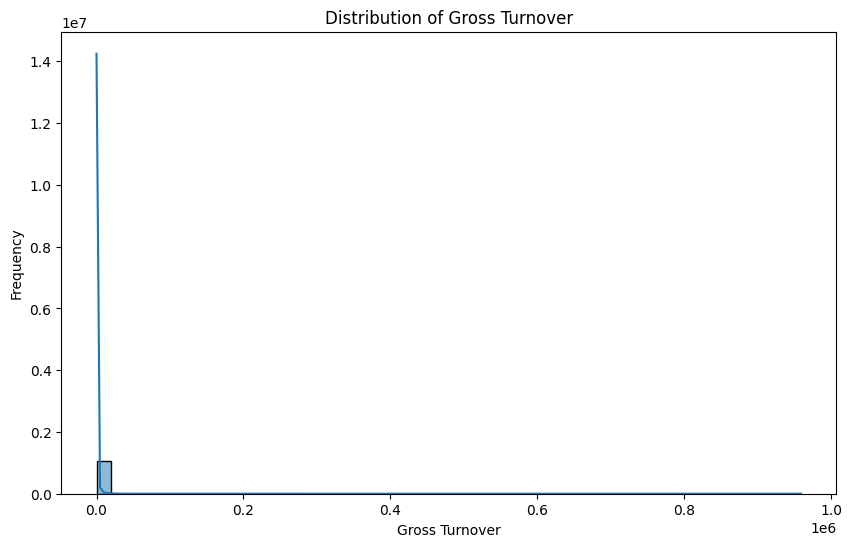

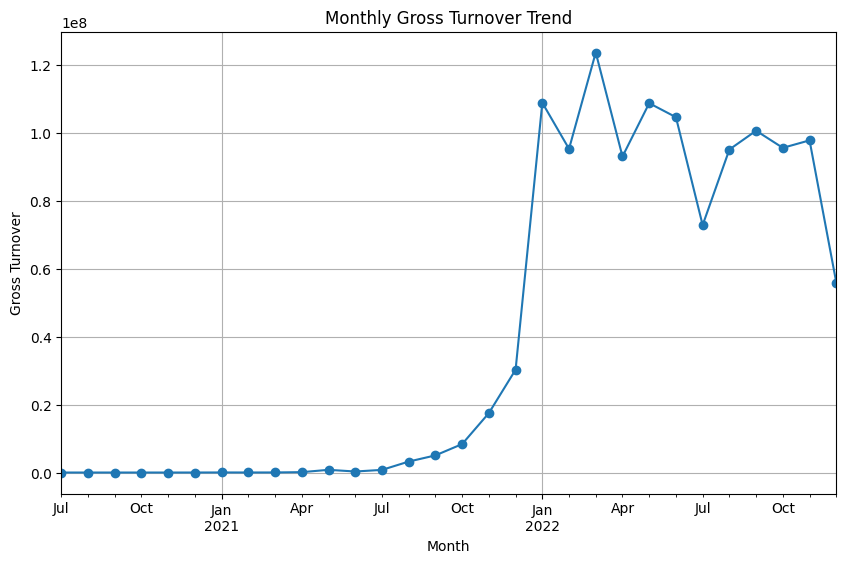

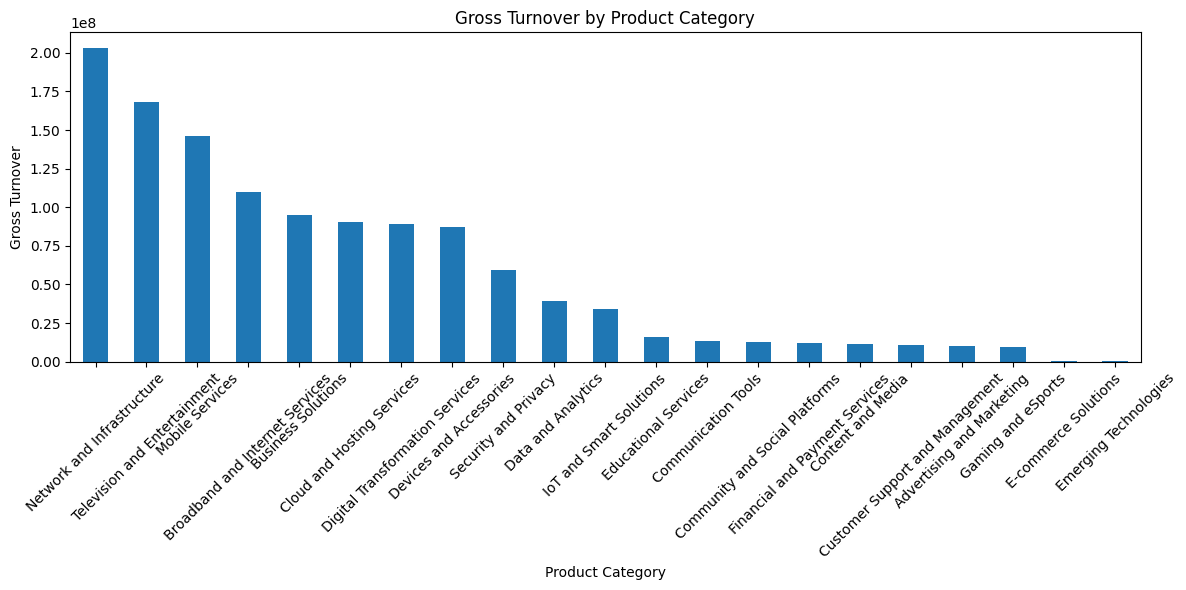

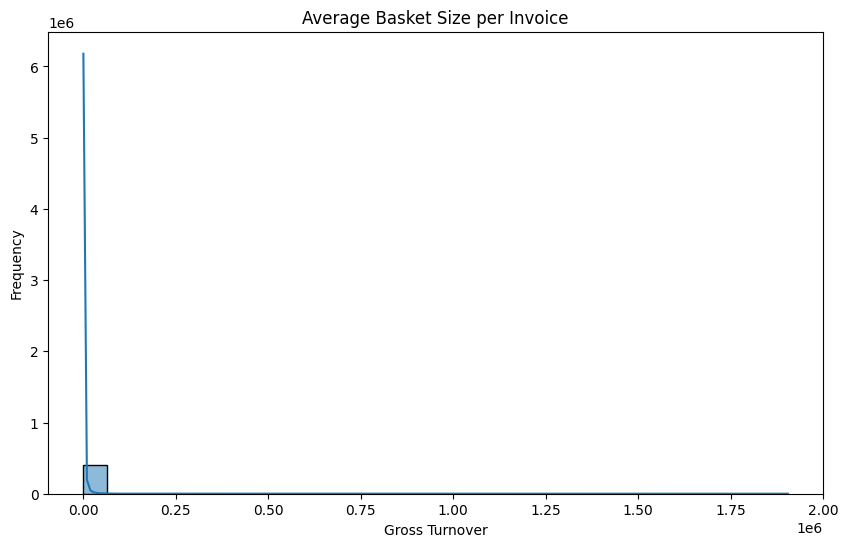


Top 10 Products by Total Gross Turnover:
PRODUCT
RIVS-DF1810   6195275.59
RIGR-DF1810   3767996.24
RAKB363       3355983.90
10001110141   2755247.55
RAKB362       2504128.83
7889405395    2427797.30
RAKB364       2071529.55
5731103611    1904999.60
7889226684    1830248.55
JXAK          1823204.98
Name: GROSS_TURNOVER, dtype: float64


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Basic Info & Structure
print("Dataset Shape:", df_Filtered.shape)
print("\nDataset Info:")
print(df_Filtered.info())
print("\nDataset Summary Statistics:")
print(df_Filtered.describe())

# 2. Missing Values Check
print("\nMissing Values Count:")
print(df_Filtered.isnull().sum())

# 3. Top Customers by Sales
top_customers = df_Filtered.groupby('CUSTOMER_NUMBER')['GROSS_TURNOVER'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Gross Turnover:")
print(top_customers)

# 4. Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_Filtered['GROSS_TURNOVER'], bins=50, kde=True)
plt.title('Distribution of Gross Turnover')
plt.xlabel('Gross Turnover')
plt.ylabel('Frequency')
plt.show()

# 5. Sales Trend Over Time
# Convert DOCUMENT_DATE to datetime if not already
df_Filtered['DOCUMENT_DATE'] = pd.to_datetime(df_Filtered['DOCUMENT_DATE'])

# Monthly turnover trend
monthly_sales = df_Filtered.groupby(df_Filtered['DOCUMENT_DATE'].dt.to_period('M'))['GROSS_TURNOVER'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Gross Turnover Trend')
plt.ylabel('Gross Turnover')
plt.xlabel('Month')
plt.grid(True)
plt.show()

# 6. Sales by Product Category
sales_by_cat = df_Filtered.groupby('ProdCat1')['GROSS_TURNOVER'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_cat.plot(kind='bar', title='Gross Turnover by Product Category')
plt.ylabel('Gross Turnover')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Average Basket Size per Customer
# Avg turnover per invoice (basket size)
basket_size = df_Filtered.groupby('INVOICE_NUMBER')['GROSS_TURNOVER'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(basket_size, bins=30, kde=True)
plt.title('Average Basket Size per Invoice')
plt.xlabel('Gross Turnover')
plt.ylabel('Frequency')
plt.show()

# 8. Top Products by Sales
top_products = df_Filtered.groupby('PRODUCT')['GROSS_TURNOVER'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Total Gross Turnover:")
print(top_products)


## Pareto Analysis

**Pareto Analysis** is a strategic decision-making tool used to prioritize actions based on the principle that a small number of causes typically lead to a large portion of the effects. Known as the 80/20 rule or the Pareto Principle, this concept is highly applicable in customer and product management, helping businesses focus on the most impactful areas to maximize efficiency and profitability.

## Key Concepts


**i) Pareto Principle (80/20 Rule):**

In the context of customers and products, this principle suggests that roughly 80% of a company’s revenue comes from 20% of its customers or products. Understanding this can help businesses focus their efforts on the most valuable segments.

**ii) Pareto Chart:**

A Pareto chart is a graphical tool that helps visualize and prioritize the most significant factors among a set. It combines a bar graph and a line graph, where bars represent individual values in descending order, and the line shows the cumulative total.

***An example of Pareto Chart and Pareto Analysis:***

![image-2.png](attachment:image-2.png)

Here is the Pareto chart for products and their corresponding revenues. The chart consists of two key elements:

**Bar Chart:** The blue bars represent the individual revenue contributions of each product, sorted in descending order.

**Line Chart:** The red line shows the cumulative percentage of the total revenue contributed by the products. The horizontal
gray dashed line indicates the 80% mark.

***Analysis***

- Product Contribution: The first few products (A, B, and C) generate a significant portion of the revenue, highlighting the "vital few" that follow the Pareto Principle.
- Cumulative Percentage: By the time we include Product E, the cumulative revenue reaches around 80% of the total, illustrating that a small number of products contribute to the majority of the revenue.

***Implications***

- Focus on Key Products: Efforts should be concentrated on optimizing and promoting these top-performing products to maximize revenue.
- Resource Allocation: Inventory, marketing, and development resources should be prioritized for these high-impact products to enhance business efficiency and profitability.
- Customer Strategies: Understanding which products are most valued by customers can help in tailoring marketing and customer engagement strategies.


Using Pareto analysis helps businesses identify and focus on the most impactful products, ensuring efficient use of resources and targeted efforts towards driving revenue growth.

To execute the pareto analysis, you must create the required dataset. There are two levels of Product category in this dataset, use ProdCat2 for this analysis.

***Task 2.2: Create a new dataframe df_Pareto with the columns: ProdCat2, Gross_Turnover, Cumulative_GT, Cumulative_GT%***

*Hint: Cumulative_GT is Cumulative Gross Turnover which you can get by doing a cumulative sum on the Gross Turnover.*



In [82]:
# Step 1: Aggregate Gross Turnover by Product Category (ProdCat2)
df_pareto = df_Filtered.groupby('ProdCat2')['GROSS_TURNOVER'].sum().reset_index()

# Step 2: Sort the DataFrame by Gross Turnover in descending order
df_pareto = df_pareto.sort_values(by='GROSS_TURNOVER', ascending=False)

# Step 3: Calculate Cumulative Gross Turnover
df_pareto['Cumulative_GT'] = df_pareto['GROSS_TURNOVER'].cumsum()

# Step 4: Calculate the total Gross Turnover
total_gt = df_pareto['GROSS_TURNOVER'].sum()

# Step 5: Calculate Cumulative Gross Turnover percentage
df_pareto['Cumulative_GT%'] = (df_pareto['Cumulative_GT'] / total_gt) * 100

# Preview the df_Pareto dataframe
print(df_pareto.head())

                            ProdCat2  GROSS_TURNOVER  Cumulative_GT  \
121          Mobile Plans (Postpaid)     72744218.05    72744218.05   
18        Broadband Internet (Fiber)     51615229.45   124359447.49   
133  Network Infrastructure Services     50432370.07   174791817.56   
122           Mobile Plans (Prepaid)     43606279.34   218398096.90   
152      Over-the-Top (OTT) Services     37846236.52   256244333.42   

     Cumulative_GT%  
121            5.97  
18            10.20  
133           14.34  
122           17.92  
152           21.03  


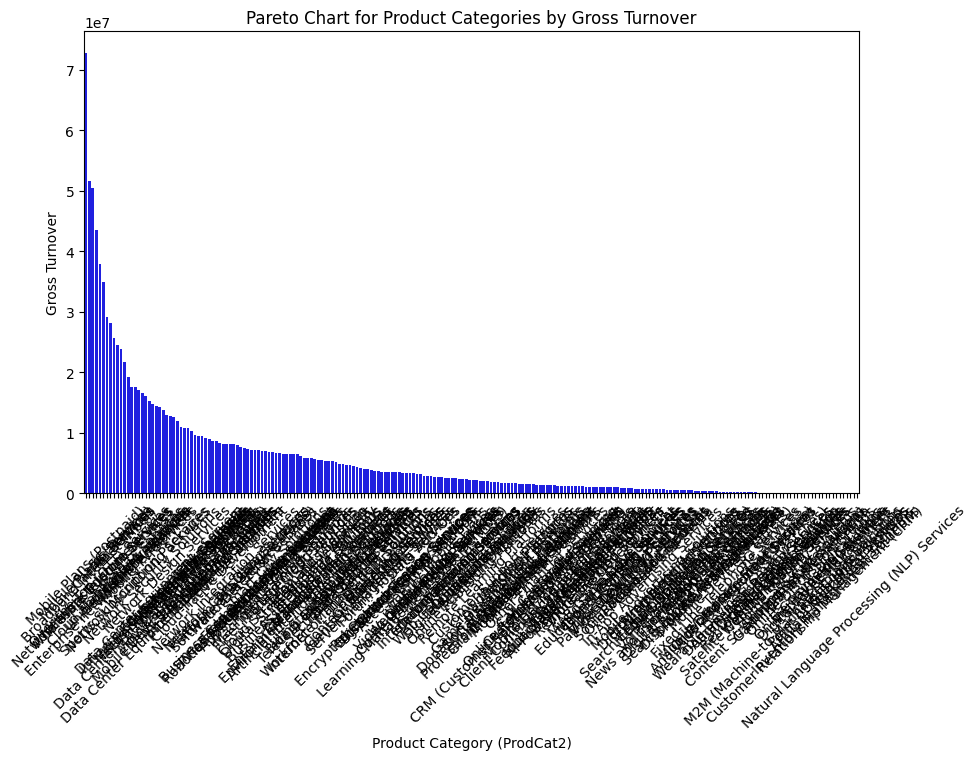

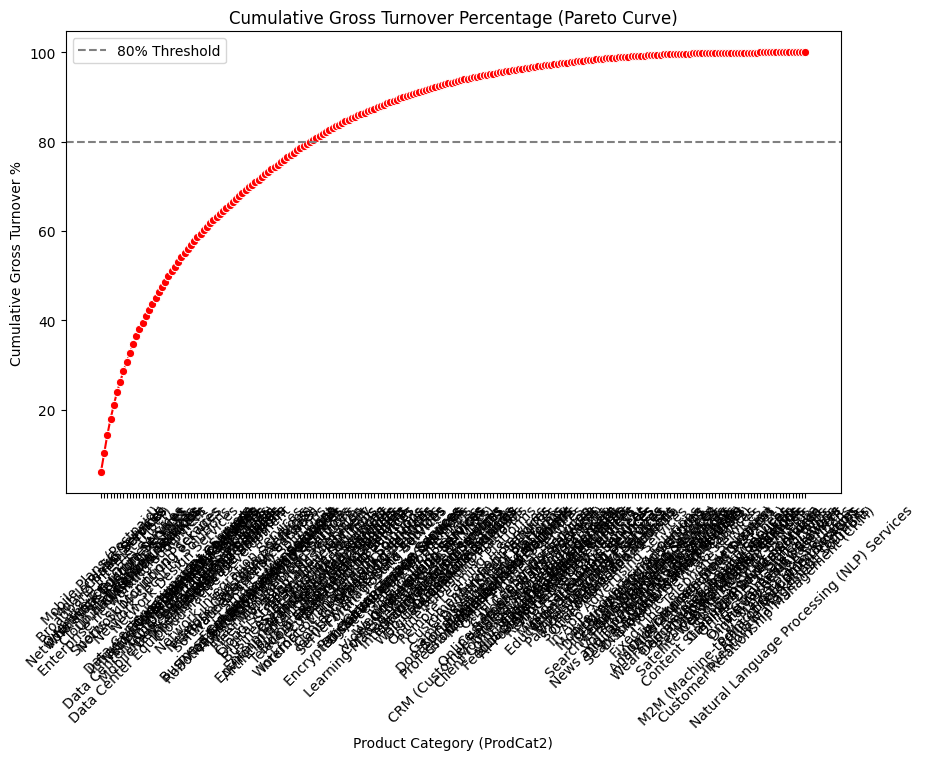

In [83]:
# Optional: Visualize the Pareto chart
plt.figure(figsize=(10, 6))
sns.barplot(x='ProdCat2', y='GROSS_TURNOVER', data=df_pareto, color='blue')
plt.ylabel('Gross Turnover')
plt.xlabel('Product Category (ProdCat2)')
plt.title('Pareto Chart for Product Categories by Gross Turnover')
plt.xticks(rotation=45)
plt.show()

# Plot Cumulative Percentage
plt.figure(figsize=(10, 6))
sns.lineplot(x='ProdCat2', y='Cumulative_GT%', data=df_pareto, color='red', marker='o')
plt.axhline(80, color='gray', linestyle='--', label='80% Threshold')
plt.ylabel('Cumulative Gross Turnover %')
plt.xlabel('Product Category (ProdCat2)')
plt.title('Cumulative Gross Turnover Percentage (Pareto Curve)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

***Task 2.3: Arrive at a "Pareto filtered" dataset df_Pareto_80 with the top product categories that contribute to 80% of the Gross Turnover***

*Hint: There are 64 products that contribute to 80% of Gross Revenue turnover*

                                      ProdCat2  GROSS_TURNOVER  Cumulative_GT  \
121                    Mobile Plans (Postpaid)     72744218.05    72744218.05   
18                  Broadband Internet (Fiber)     51615229.45   124359447.49   
133            Network Infrastructure Services     50432370.07   174791817.56   
122                     Mobile Plans (Prepaid)     43606279.34   218398096.90   
152                Over-the-Top (OTT) Services     37846236.52   256244333.42   
213                 Wholesale Telecom Services     34957004.94   291201338.36   
132                    Network Equipment Sales     29210367.62   320411705.99   
71             Enterprise networking equipment     28231487.09   348643193.07   
23                            Carrier Services     25675420.82   374318613.89   
30                  Cloud and Hosting Services     24528147.31   398846761.20   
2                                  5G Services     23854005.45   422700766.66   
1                           

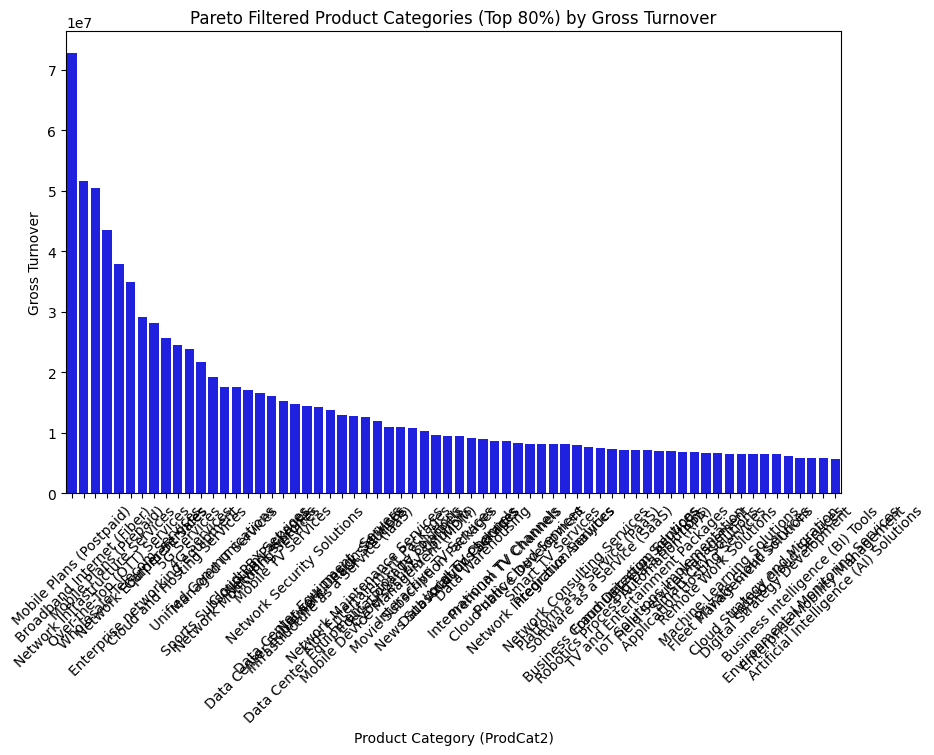

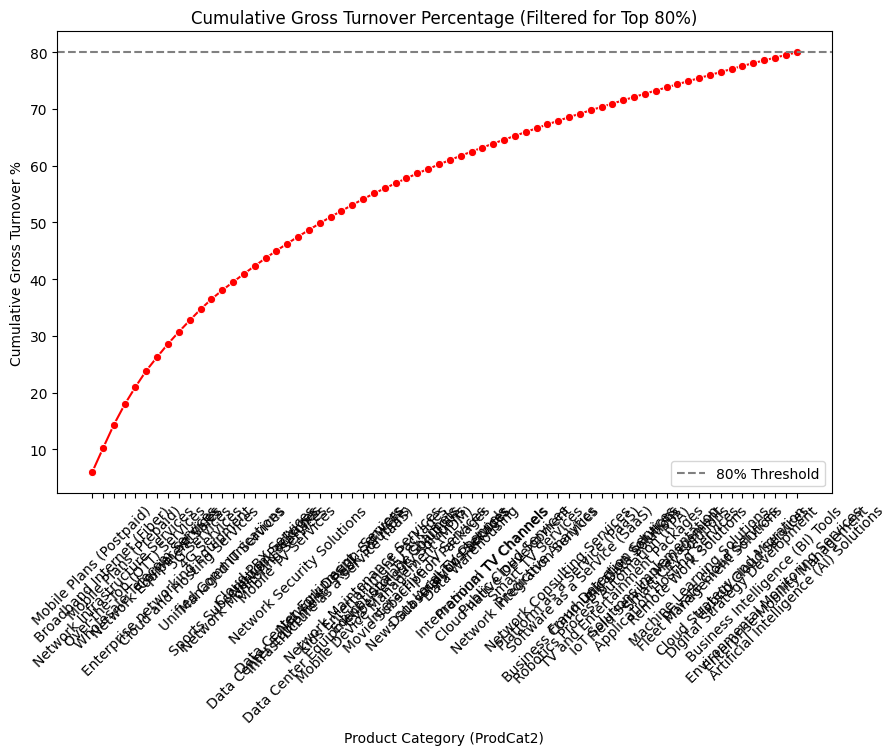

In [84]:
# Step 1: Create the df_Pareto DataFrame (same as Task 2.2)
df_pareto = df_Filtered.groupby('ProdCat2')['GROSS_TURNOVER'].sum().reset_index()
df_pareto = df_pareto.sort_values(by='GROSS_TURNOVER', ascending=False)

# Step 2: Calculate Cumulative Gross Turnover and Cumulative Percentage
df_pareto['Cumulative_GT'] = df_pareto['GROSS_TURNOVER'].cumsum()
total_gt = df_pareto['GROSS_TURNOVER'].sum()
df_pareto['Cumulative_GT%'] = (df_pareto['Cumulative_GT'] / total_gt) * 100

# Step 3: Filter for top product categories that contribute to 80% of Gross Turnover
df_Pareto_80 = df_pareto[df_pareto['Cumulative_GT%'] <= 80]

# Preview the df_Pareto_80 DataFrame
print(df_Pareto_80)

# Optional: Visualize the Pareto filtered dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='ProdCat2', y='GROSS_TURNOVER', data=df_Pareto_80, color='blue')
plt.ylabel('Gross Turnover')
plt.xlabel('Product Category (ProdCat2)')
plt.title('Pareto Filtered Product Categories (Top 80%) by Gross Turnover')
plt.xticks(rotation=45)
plt.show()

# Optional: Cumulative percentage plot for the filtered dataset
plt.figure(figsize=(10, 6))
sns.lineplot(x='ProdCat2', y='Cumulative_GT%', data=df_Pareto_80, color='red', marker='o')
plt.axhline(80, color='gray', linestyle='--', label='80% Threshold')
plt.ylabel('Cumulative Gross Turnover %')
plt.xlabel('Product Category (ProdCat2)')
plt.title('Cumulative Gross Turnover Percentage (Filtered for Top 80%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


***Task 2.3: Display the Pareto Chart***

*Hint: Your Pareto Chart will look something like this*

![image.png](attachment:image.png)


***Task 2.4: Perform the necessary action to map the top products from Pareto Analysis to the previously created master dataframe df_Filtered and store this in a new dataframe df_Filtered_Pareto.***

*Hint: Think Joins?*

In [90]:
# Step 1: Extract the top product categories (ProdCat2) from df_Pareto_80
top_product_categories = df_Pareto_80['ProdCat2']

# Step 2: Filter df_Filtered for only those products in top_product_categories using a merge (join)
df_Filtered_Pareto = df_Filtered[df_Filtered['ProdCat2'].isin(top_product_categories)]

# Preview the df_Filtered_Pareto dataframe
print(df_Filtered_Pareto.head())

# Optional: Check if the filtering is correct by verifying unique values in ProdCat2
print(f"Unique Product Categories in df_Filtered_Pareto: {df_Filtered_Pareto['ProdCat2'].unique()}")


     INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
530  47154      124195645            10    2022-09-09           15082   
531  47184      124167744            70    2022-09-07           15082   
536  48255      124385024           480    2022-10-10           15082   
538  48315      123063686            10    2022-03-02           15082   
539  48316      123063686            30    2022-03-02           15082   

    Main_account  Main_account_name Main_resposible_employee_name     PRODUCT  \
530       103350  Customer Group_24       Responsible Employee_17  5737657492   
531       103350  Customer Group_24       Responsible Employee_17  4441429746   
536       103350  Customer Group_24       Responsible Employee_17    31592006   
538       103350  Customer Group_24       Responsible Employee_17     JSF 505   
539       103350  Customer Group_24       Responsible Employee_17     JSF 406   

    Position_type_order_line  ...  ProductID_y  ProductCategoryID_y  \
530

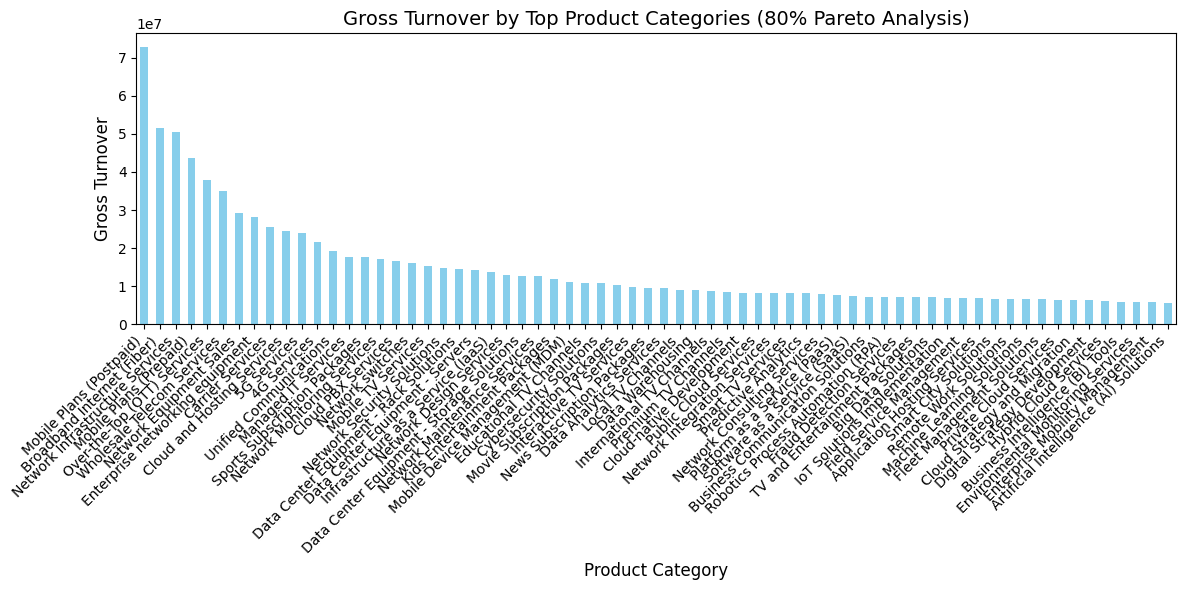

In [92]:
import matplotlib.pyplot as plt

# Step 1: Extract the top product categories (ProdCat2) from df_Pareto_80
top_product_categories = df_Pareto_80['ProdCat2']

# Step 2: Filter df_Filtered for only those products in top_product_categories using a merge (join)
df_Filtered_Pareto = df_Filtered[df_Filtered['ProdCat2'].isin(top_product_categories)]

# Plotting the distribution of Gross Turnover across the filtered product categories
plt.figure(figsize=(12, 6))

# Create a bar plot showing the Gross Turnover by Product Category
top_product_turnover = df_Filtered_Pareto.groupby('ProdCat2')['GROSS_TURNOVER'].sum().sort_values(ascending=False)
top_product_turnover.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Gross Turnover by Top Product Categories (80% Pareto Analysis)', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Gross Turnover', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


In the above dataset, you will notice that there are some columns that are repititive and redundant.

***Task 2.5: Remove the redundant columns and give a meaningful name to the repititive columns***

In [89]:
# Step 1: Remove redundant columns
# Drop columns that are likely redundant (columns with the same information or duplicated)
df_Filtered_Pareto_cleaned = df_Filtered_Pareto.drop(columns=[
    'CUSTOMER_NAME_x', 'CUSTOMER_NAME_y',         # Customer names from different sources
    'ACCOUNT_GROUP_TXT_x', 'ACCOUNT_GROUP_TXT_y', # Account group info from different sources
    'CVR_Company_status_x', 'CVR_Company_status_y', # Company status from different sources
    'Main_account_ID_x', 'Main_account_ID_y',     # Main account IDs from different sources
    'Customer_type_x', 'Customer_type_y',         # Customer type info from different sources
    'ProductID_x', 'ProductID_y',                 # Product IDs from different sources
    'ProductCategoryID_x', 'ProductCategoryID_y', # Product category IDs from different sources
    'ProdCat2_x', 'ProdCat2_y',                   # Product categories from different sources
    'ProdCat1_x', 'ProdCat1_y',                   # Product categories from different sources
])

# Step 2: Rename repetitive columns to make them more meaningful
df_Filtered_Pareto_cleaned = df_Filtered_Pareto_cleaned.rename(columns={
    'PRODUCT': 'Product_Name',                      # Rename 'PRODUCT' to 'Product_Name'
    'PRODUCT_ID': 'Product_ID',                     # Rename 'PRODUCT_ID' to 'Product_ID'
    'ProductCategoryID': 'Product_Category_ID',     # Rename 'ProductCategoryID' to 'Product_Category_ID'
    'ProdCat2': 'Product_Category_Level_2',         # Rename 'ProdCat2' to 'Product_Category_Level_2'
    'ProdCat1': 'Product_Category_Level_1',         # Rename 'ProdCat1' to 'Product_Category_Level_1'
    'CUSTOMER_NUMBER': 'Customer_ID',               # Rename 'CUSTOMER_NUMBER' to 'Customer_ID'
    'GROSS_TURNOVER': 'Gross_Turnover',             # Rename 'GROSS_TURNOVER' to 'Gross_Turnover'
    'AMOUNT': 'Amount',                             # Rename 'AMOUNT' to 'Amount'
    'Main_account': 'Main_Account_Name',            # Rename 'Main_account' to 'Main_Account_Name'
    'Main_account_name': 'Main_Account_Description',# Rename 'Main_account_name' to 'Main_Account_Description'
})

# Step 3: Verify the final dataframe structure
print(df_Filtered_Pareto_cleaned.head())


     INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE Customer_ID  \
530  47154      124195645            10    2022-09-09       15082   
531  47184      124167744            70    2022-09-07       15082   
536  48255      124385024           480    2022-10-10       15082   
538  48315      123063686            10    2022-03-02       15082   
539  48316      123063686            30    2022-03-02       15082   

    Main_Account_Name Main_Account_Description Main_resposible_employee_name  \
530            103350        Customer Group_24       Responsible Employee_17   
531            103350        Customer Group_24       Responsible Employee_17   
536            103350        Customer Group_24       Responsible Employee_17   
538            103350        Customer Group_24       Responsible Employee_17   
539            103350        Customer Group_24       Responsible Employee_17   

    Product_Name Position_type_order_line  Gross_Turnover  Amount  \
530   5737657492                   

**This analysis gives an understanding of the top product portfolio of the company. This will be further used to perform customer segmentation.**

### 3. Customer Segmentation

The next part in this analysis is to find meaningful customer segments from the product purchase behaviour.

You will use **KMeans Clustering Algorithm** for this.

### KMeans Algorithm
The KMeans algorithm is a popular clustering technique used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. Here are the steps involved in the KMeans algorithm:

**Initialization:**

- Choose the optimal number of clusters K, say 3 in this case.
- Randomly select K data points from the dataset as the initial centroids (cluster centers).

![image-2.png](attachment:image-2.png)

**Assignment Step:**

- Assign each data point to the nearest centroid. This is usually done by calculating the Euclidean distance between each data point and the centroids.
- Each data point is assigned to the cluster whose centroid is closest to it.

**Update Step:**

- Recalculate the centroids as the mean of all data points assigned to each cluster.
- The new centroid for each cluster is the average of the positions of all the data points in that cluster.

![image-3.png](attachment:image-3.png)

**Repeat:**

- Repeat the Assignment and Update steps until the centroids no longer change significantly or a specified number of iterations is reached.
- This convergence indicates that the clusters are stable, and the algorithm has found the optimal clustering.

![image-4.png](attachment:image-4.png)

**Termination:**

- The algorithm terminates when the centroids have stabilized (i.e., they do not change significantly between iterations) or after a pre-defined number of iterations.



To execute this analysis, **Main Account** and **ProdCat1** (is a broader product category and is at the highest level in the product hierarchy) data will be used.

*Note: ProdCat2 level data is at a very granular level and performing clustering analysis on this might not give meaningful clusters.*

To proceed with the customer segmentation analysis, you need to menaingfully prepare the data.

***Task 3.1: Transform the data to feed to the clustering algorithm***

- Create a copy of the above dataframe and save it as **df_segment**
- Create a Primary Key: Concatenate the Main Account (ID) and Main Account Name
- Execute a groupby operation to calculate the annual turnover of each customer for each product (ProdCat1)
- Calculate the % spend by each customer across different product categories

The resultant dataframe will have the following columns:
- Primary Key
- ProdCat1
- Gross_Turnover
- Customer Spend %

In [ ]:
#Insert your code

***Task 3.2: Pivot the dataset to create a matrix view of spend % of all customers on all products (ProdCat1). Save the dataframe as df_pivot. Create another dataframe df_clustering removing the primary key from the df_pivot dataframe.***

In [ ]:
#Insert your code

### The Elbow Method in KMeans Clustering

The Elbow Method is a commonly used technique to determine the optimal number of clusters (K) in KMeans clustering. It helps to balance between underfitting and overfitting by finding a point where adding more clusters doesn’t significantly improve the model performance.

![image.png](attachment:image.png)

***Explanation of the Plot***

**WCSS (Within Cluster Sum of Squares) vs. Number of Clusters:**

- The x-axis represents the number of clusters (K).
- The y-axis represents the Within-Cluster Sum of Squares (WCSS), which measures the variance within each cluster.

**Plotting WCSS for Different K Values:**

- For each value of K (from 1 to 10), the KMeans algorithm is run, and the corresponding WCSS is calculated.
- The plot shows how WCSS decreases as the number of clusters increases.

**Elbow Point:**

- The red point marked on the plot indicates the "elbow point" where the rate of decrease in WCSS slows down.
- In this example, the elbow point is at K = 3. This suggests that 3 clusters are optimal for this dataset, as adding more clusters beyond this point results in only a marginal reduction in WCSS.

**Interpretation:**

- Before the Elbow Point: Adding more clusters significantly reduces WCSS, indicating that the clusters are becoming more defined and compact.
- After the Elbow Point: The reduction in WCSS slows down, meaning that adding more clusters doesn’t significantly improve the clustering.

**Conclusion**

The Elbow Method helps to identify the optimal number of clusters by looking for the point where the WCSS starts to decrease at a slower rate, balancing model complexity and performance. In this case, the plot suggests that using 3 clusters is a good choice for the dataset.

***Task 3.3: Run K-Means clustering algorithm and identify the optimal number of clusters using Elbow Method***

In [ ]:
#Insert your code

The Elbow Curve provides an optimal value for 'k' that is the number of clusters to be generated in the output. This value can be used as a guideline for the actual clustering run; one may vary the number of clusers in the output based on business need.

***Task 3.4: Run the KMeans algorithm with optimal number of clusters***

In [ ]:
#Insert your code

***Task 3.5: From the above clusters, create cluster profile***

***Task 3.5.1: Map each customers to their respective cluster in df_segment dataset***

In [ ]:
#Insert your code

***Task 3.5.2: Create a cluster profile table with the cluster label, Gross Turnover for each cluster, Number of unique customers in each cluster, % share of Gross Turnover of each cluster for each product.***

*Illustrative: Here is a snapshot of the desired cluster profile:*
![image-2.png](attachment:image-2.png)

In [ ]:
#Insert your code

### 4. Prepare data for Tableau Dashboard

From here, you will be creating the visualizations in Tableau. But before, creating the required visualizations in Tableau, you should prepare the data.

Here is a reference of how data for visualizations for **Customer Segmentation** looks like:

![image-5.png](attachment:image-5.png)






Here is a reference of how data for visualizations for **Product Categorization** looks like:

![image-4.png](attachment:image-4.png)

where:

- Product ID: SKU ID
- Gross Turnover (sum), Amount (sum), Invoice_count (distinct count of invoices), Main_account_count (distinct count of main accounts): fields aggregated at SKU level
- Above columns with _percluster: fields aggregated at cluster level
- Frequency (%) : number of transactions the SKU appeared on, when compared to all transactions in a cluster
- Customer Prevalence (%) within cluster : Percentage of customers within a cluster who purchase the SKU



In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

In [ ]:
# Insert your codes here

***The End***